In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from squlearn.feature_map.qcnn_feature_map import prototype_routine

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

import numpy as np

from squlearn.expectation_operator import SingleAmplitude
from squlearn.qnn import QNN
from qiskit.primitives import Estimator

Warning on convolutional layer: The quantum circuit input controls too many qubits: 3 qubits on input vs. 2 qubits on the actual circuit.


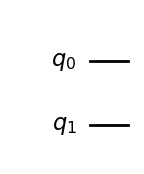

In [2]:
# Testen, was passiert, wenn man ein Gate reingibt mit zu vielen Qubits:

qcnn_test_map = qcnn_feature_map(2)

x = ParameterVector("x", 3)
gate_qc = QuantumCircuit(3)
gate_qc.crx(x[0],0,1)
gate_qc.crx(x[2],0,2)
gate_qc.crx(x[1],1,2)

qcnn_test_map.convolution(gate_qc, entangled=True,operator="A")

#qcnn_test_map.pooling(gate_qc) erzeugt Fehler, weil zu viele Qubits angesteuert werden

qcnn_param_vec = ParameterVector("p", qcnn_test_map.num_parameters)
qcnn_test_map.get_circuit([],qcnn_param_vec).draw()


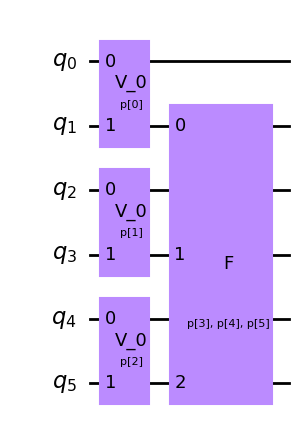

In [3]:

qcnn_map = qcnn_feature_map(6)



x = ParameterVector("x", 3)
gate_qc = QuantumCircuit(3)
gate_qc.crx(x[0],0,1)
gate_qc.crx(x[2],0,2)
gate_qc.crx(x[1],1,2)

#z = ParameterVector("z",2)
#gate2 = QuantumCircuit(2)

y = ParameterVector("y",2)
pooling_gate1 = QuantumCircuit(2)
pooling_gate1.crx(y[0],0,1)

a = ParameterVector("a",4)
fully_gate = QuantumCircuit(1)
fully_gate.rx(a[0],0)
fully_gate.rx(a[1],0)
fully_gate.rx(a[2],0)
fully_gate.rx(a[3],0)

b = ParameterVector("b",3)
fully_gate2 = QuantumCircuit(3)
fully_gate2.rx(b[0],0)
fully_gate2.rx(b[1],2)
fully_gate2.rx(b[2],1)


#qcnn_map.convolution(gate_qc, entangled=False,operator="A",var_param = False)
#qcnn_map.convolution(gate_qc, entangled=False,operator="A",var_param = True)
#qcnn_map.pooling(pooling_gate1,var_param = True)
#qcnn_map.convolution(gate_qc, entangled=True,operator="A",var_param = True)

qcnn_map.pooling(pooling_gate1,var_param = True)
#qcnn_map.pooling(pooling_gate1,var_param = True)
#qcnn_map.pooling(pooling_gate1,var_param = True)

qcnn_map.fully_connected(fully_gate2)
#qcnn_map.fully_connected(fully_gate)

"""
#qcnn_map.convolution(gate_qc, entangled=True,operator="C")
qcnn_map.convolution(gate_qc, entangled = True)

qcnn_map.pooling(pooling_gate1)

#qcnn_map.convolution(gate2, entangled=True)
qcnn_map.convolution(gate2)





#qcnn_map.pooling(pooling_gate1,operator="P")
qcnn_map.pooling(pooling_gate1)

qcnn_map.convolution(gate2)

#qcnn_map.pooling(pooling_gate1)
#qcnn_map.pooling(pooling_gate1)
#qcnn_map.pooling(pooling_gate1)

#qcnn_map.pooling(pooling_gate1, "B")

"""


#fully_connected_gate = QuantumCircuit(1)
#fully_connected_gate.h(0)

#fully_connected_gate = QuantumCircuit(2)
#fully_connected_gate.h(0)
#fully_connected_gate.h(1)

#qcnn_map.fully_connected(fully_connected_gate) #TODO: Benutzer muss richtige Anzahl an qubits eingeben


param_vec_for_qcnn = ParameterVector("p", qcnn_map.num_parameters)


#param_vec_for_qcnn = ParameterVector("p", qcnn_map.num_parameters) # TODO
#qcnn_map.draw() # TODO: funktioniert noch nicht


qcnn_map.get_circuit([],param_vec_for_qcnn).draw()
#print(qcnn_map.get_qubits_left())
#qcnn_map.get_circuit([],param_vec_for_qcnn).decompose().draw()






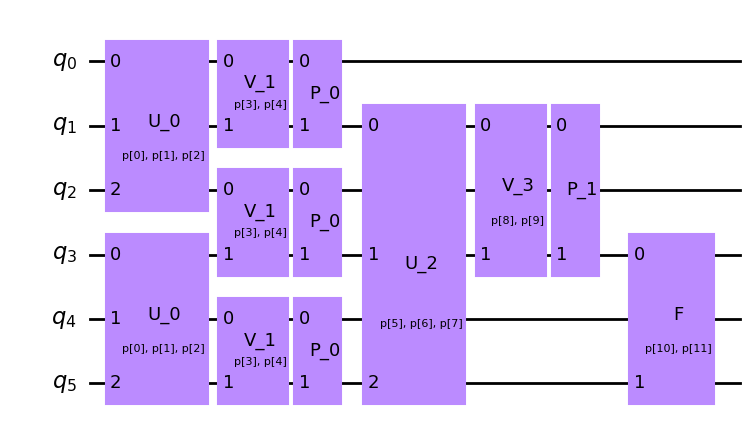

In [4]:
# feature map zum Trainieren:
qcnn_train = qcnn_feature_map(6)

x = ParameterVector("x", 3)
gate_qc = QuantumCircuit(3)
gate_qc.crx(x[0],0,1)
gate_qc.crx(x[2],0,2)
gate_qc.crx(x[1],1,2)

y = ParameterVector("y", 2)
gate_conv2 = QuantumCircuit(2)
gate_conv2.crz(y[0],0,1)
gate_conv2.crz(y[1],1,0)

pooling_gate1 = QuantumCircuit(2)
pooling_gate1.cx(0,1)

# Fully für 2 Qubits
a = ParameterVector("a",2)
fully_gate = QuantumCircuit(2)
fully_gate.rx(a[0],0)
fully_gate.rx(a[1],1)


#Fully für 3 Qubits
b = ParameterVector("b",3)
fully_gate2 = QuantumCircuit(3)
fully_gate2.rx(b[0],0)
fully_gate2.rx(b[1],2)
fully_gate2.rx(b[2],1)


qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = False)
qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

qcnn_train.pooling(pooling_gate1,operator="P")

qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = False)
qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

qcnn_train.pooling(pooling_gate1,operator="P")
qcnn_train.fully_connected(fully_gate)
#print(qcnn_train.get_qubits_left())
param_vec_for_qcnn = ParameterVector("p", qcnn_train.num_parameters)
qcnn_train.get_circuit([],param_vec_for_qcnn).draw()



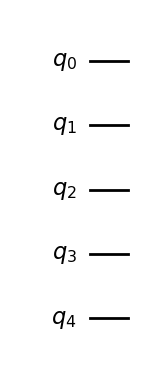

In [5]:

qcnn_map = qcnn_feature_map(5)
qcnn_map.draw()



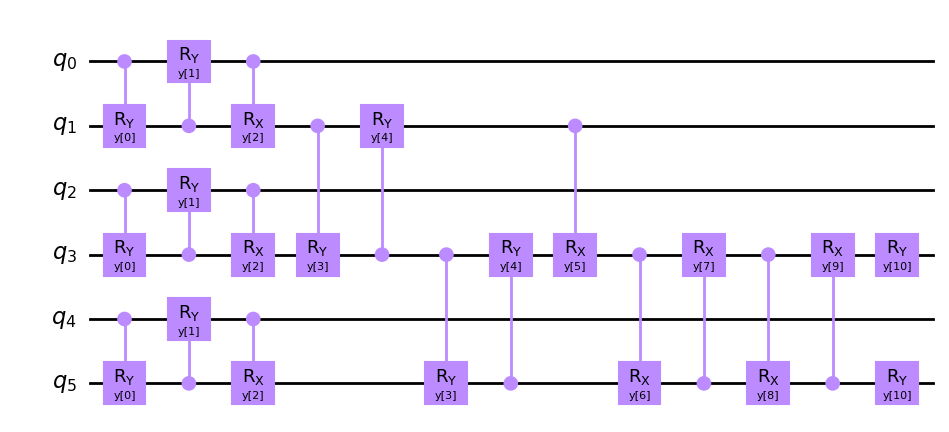

In [6]:
#Richtig reudiges Beispiel
parametervec = ParameterVector("y",20)
prototype_routine(6,parametervec).decompose().draw()



In [7]:
# Experiment mit Nullen und Einsen 

def generate_binary_data(size, cardinality):
    X = np.random.randint(2, size=(cardinality,size))
    Y = np.count_nonzero(X==0,axis=1)
    for i in range(len(Y)):
        zeros = Y[i]
        if 2*zeros > size:
            Y[i] = 0
        else:
            Y[i] = 1    
    return X,Y

print(generate_binary_data(10,100))




(array([[0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0

In [8]:
TranspiledFeatureMap(pqc, self.backend)

NameError: name 'TranspiledFeatureMap' is not defined

In [ ]:


operator = SingleAmplitude(6,3)

print(operator)


0.5 * IIIIII
+ 0.5 * IIZIII


In [ ]:

qcnn = QNN(qcnn_map,operator,estimator=Estimator())


self._qubit_map {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
self._num_all_qubits 5
blank IIIII


KeyError: 5